<a href="https://colab.research.google.com/github/peepeepoopooooo/2022-update-shecodes/blob/main/Single_Systems_Qiskit_Programming_210324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Matrix and vector are computed with array
from numpy import array


ket0 = array([1, 0])
ket1 = array([0, 1])

ket0 / 2 + ket1 / 2

array([0.5, 0.5])

In [8]:
pip install -U qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.8 MB/s eta 0:00:00


In [10]:
from qiskit.visualization import array_to_latex

In [11]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

In [12]:
array_to_latex(M1)

<IPython.core.display.Latex object>

In [13]:
array_to_latex(M2)

<IPython.core.display.Latex object>

In [14]:
from numpy import matmul

In [17]:
matmul(M1, ket1)


array([1, 0])

In [18]:
matmul(M1, M2)


array([[2, 1],
       [0, 0]])

In [19]:
matmul(M2, M1)

array([[1, 1],
       [1, 1]])

In [20]:
#Aim of Statevector function: #1 define vectors and let us use function like `draw()` on them

from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [21]:
u.draw('latex')

<IPython.core.display.Latex object>

In [22]:
v.draw('text')

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [23]:
#Aim of <Statevector function>: #1 define vectors and let us use function .is_valid()
#<is_valid()> check if the Euclidean norm = 1

In [24]:
w.is_valid()

False

In [25]:
v.is_valid()

True

In [26]:
u.is_valid()

True

In [29]:
#<function .measure() aim> simulates a standard basis measurement.
#It returns the result of that measurement + plus the new quantum state after that measurement.
#the measure changes everytime because of the probability
v.measure()


('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

In [31]:
#they are said to differ by a global phase because one is equal to the other multiplied by a complex number on the unit circle.

#<function .sample_counts(n number of count)> results AFTER n number of measurement

v.sample_counts(1000)

{'0': 592, '1': 408}

In [32]:
#visualize the <function .sample_counts(n number of count)>
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
statistics


{'0': 534, '1': 466}

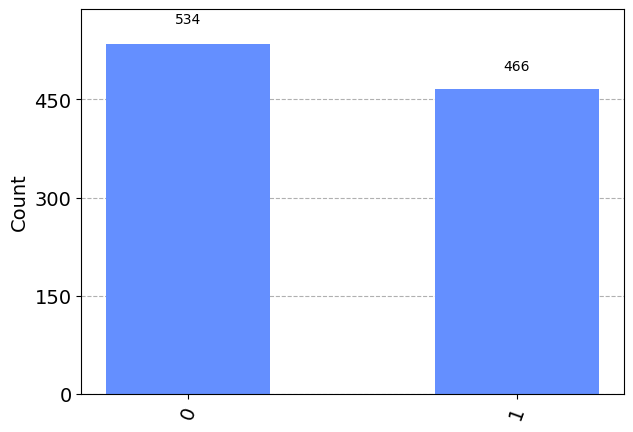

In [33]:
plot_histogram(statistics)

In [34]:
from qiskit.quantum_info import Operator

In [35]:
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

In [38]:
# <.evolve(other, qargs=None)>: Evolve a quantum state by the Operator

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

In [43]:
#QuantumCircuit(number of bits: in both qubit and classical)

from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

#the evolution is applied sequentially, from left to right
circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [51]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
#== elongated
#v = ket0.evolve(QuantumCircuit(1))
v.draw("latex")

<IPython.core.display.Latex object>

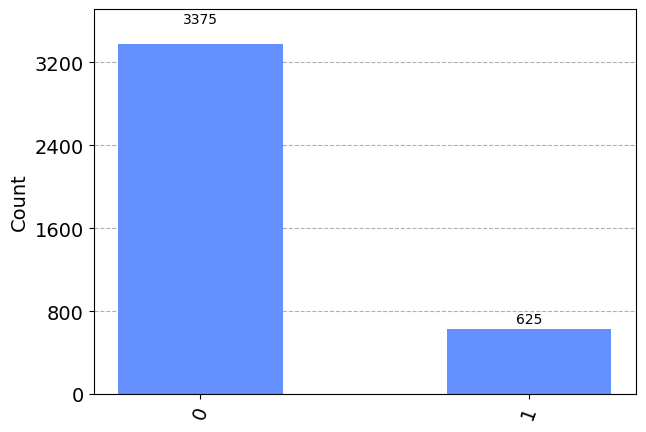

In [52]:
# simulate the result of running this experiment (i.e., preparing the state ∣0⟩,
#applying the sequence of operations represented by the circuit, and measuring) 4000 times.

statistics = v.sample_counts(4000)
plot_histogram(statistics)

#**CONGRATULATIONS !! you've done it! 210324 18h48pm  🎉 🎉 🎉 🎉 🎉 🎉**